# Neural network model

The objective of this notebook is to design a neural network model to predict customer churn. Keras library is used for designing and training the neural network.

## Import libraries

In [33]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense

## Load data

In [34]:
path = r'./out/df_clean.csv'

In [35]:
df = pd.read_csv(path, sep=';', decimal=',')

## EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP_CODE             21740 non-null  int64  
 1   DAYS_SINCE_PURCHASE  21740 non-null  int64  
 2   PURCHASE_VISITS      21740 non-null  int64  
 3   TOTAL_NET_SALES      21740 non-null  float64
 4   CC_CARD              21740 non-null  int64  
 5   AVE_AMOUNT_SPENT     21740 non-null  float64
 6   AMSPEND              21740 non-null  float64
 7   PSSPEND              21740 non-null  float64
 8   CCSPEND              21740 non-null  float64
 9   AXSPEND              21740 non-null  float64
 10  TMONSPEND            21740 non-null  float64
 11  OMONSPEND            21740 non-null  float64
 12  SMONSPEND            21740 non-null  float64
 13  PREVPD               21740 non-null  float64
 14  GMP                  21740 non-null  float64
 15  PROMOS               21740 non-null 

In [37]:
# Check for null values
df.isnull().sum()

ZIP_CODE               0
DAYS_SINCE_PURCHASE    0
PURCHASE_VISITS        0
TOTAL_NET_SALES        0
CC_CARD                0
AVE_AMOUNT_SPENT       0
AMSPEND                0
PSSPEND                0
CCSPEND                0
AXSPEND                0
TMONSPEND              0
OMONSPEND              0
SMONSPEND              0
PREVPD                 0
GMP                    0
PROMOS                 0
DAYS                   0
FREDAYS                0
MARKDOWN               0
CLASSES                0
COUPONS                0
STYLES                 0
STORES                 0
VALPHON                0
WEB                    0
MAILED                 0
RESPONDED              0
RESPONSERATE           0
HI                     0
LTFREDAY               0
CLUSTYPE               0
PERCRET                0
RESP                   0
dtype: int64

## Data preparation

In [38]:
# Create new 'prepared' dataframe
df_prep = df.copy()

In [39]:
# Create dummy-columns for object-columns
df_prep = pd.get_dummies(df_prep, columns=['CLUSTYPE'])
df_prep = pd.get_dummies(df_prep, columns=['CC_CARD'])

# Train and test

In [41]:
y = df_prep['RESP']
x = df_prep.drop(columns='RESP')

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17392, 83) (4348, 83) (17392,) (4348,)


## Feature scaling

In [43]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Neural network building and model training

In [48]:
#create an object of sequential model
nn_classifier = Sequential()

# Add the first hidden layer
nn_classifier.add(Dense(units=16, activation='relu', input_dim = 83))

# Adding the second hidden layer
nn_classifier.add(Dense(units=16, activation='relu'))

# Adding the output layer
nn_classifier.add(Dense(units=1, activation='sigmoid'))

In [49]:
nn_classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Model is trained over 100 epochs
model = nn_classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
1166/1166 [==============================] - 2s 1ms/step - loss: 0.4282 - accuracy: 0.8259 - val_loss: 0.3769 - val_accuracy: 0.8456
Epoch 2/100
1166/1166 [==============================] - 1s 903us/step - loss: 0.3686 - accuracy: 0.8478 - val_loss: 0.3672 - val_accuracy: 0.8472
Epoch 3/100
1166/1166 [==============================] - 1s 906us/step - loss: 0.3586 - accuracy: 0.8496 - val_loss: 0.3628 - val_accuracy: 0.8483
Epoch 4/100
1166/1166 [==============================] - 1s 900us/step - loss: 0.3526 - accuracy: 0.8518 - val_loss: 0.3602 - val_accuracy: 0.8486
Epoch 5/100
1166/1166 [==============================] - 1s 893us/step - loss: 0.3480 - accuracy: 0.8516 - val_loss: 0.3574 - val_accuracy: 0.8507
Epoch 6/100
1166/1166 [==============================] - 1s 887us/step - loss: 0.3444 - accuracy: 0.8529 - val_loss: 0.3563 - val_accuracy: 0.8503
Epoch 7/100
1166/1166 [==============================] - 1s 896us/step - loss: 0.3410 - accuracy: 0.8524 - val_loss: 0.3

## Predictions

In [72]:
# Predictions
y_pred = nn_classifier.predict(x_test)

# Threshold
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)

136/136 [==============================] - 0s 574us/step


## Classification report and confusion matrix plotting

In [74]:
print(classification_report(y_test.astype('int'), y_pred_binary.astype('int')))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3589
           1       0.62      0.21      0.32       759

    accuracy                           0.84      4348
   macro avg       0.74      0.59      0.61      4348
weighted avg       0.81      0.84      0.81      4348


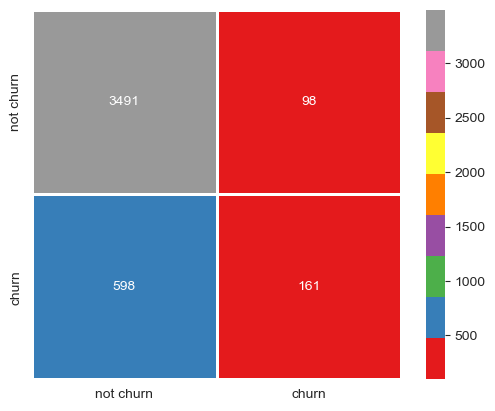

In [73]:
conf_matrix = confusion_matrix(y_test.astype('int'), y_pred_binary.astype('int'))
sn.heatmap(conf_matrix, annot=True,fmt='d', square=True, xticklabels=['not churn', 'churn'], yticklabels=['not churn', 'churn'], linewidths=2, linecolor='w', cmap='Set1')
plt.subplots_adjust(wspace=.3, hspace=.3)

## Visualize Loss and Accuracy

In [54]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


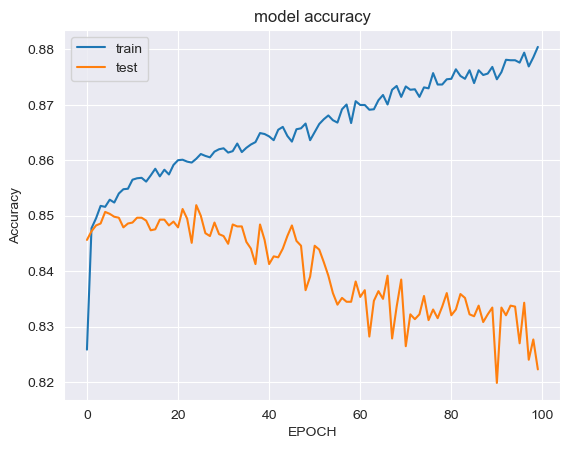

In [55]:
#Accuracy vs Value Accuracy
model.history.keys()

# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

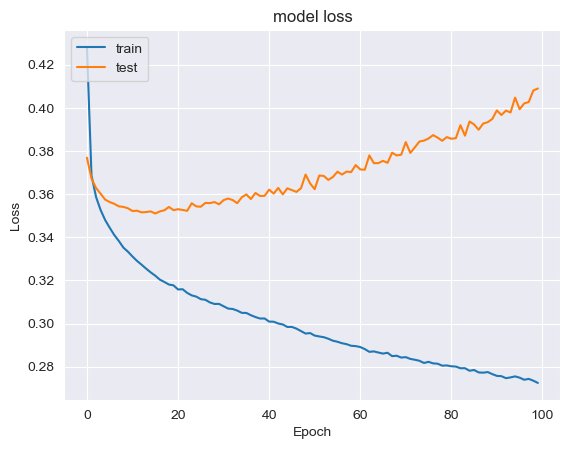

In [56]:
#loss vs value loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction and Model Score/Accuracy

In [57]:
#Model score calculation
score = accuracy_score(y_pred.astype('int'),y_test.astype('int'))
print(score)

0.8254369825206992
